In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import os
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
fileName = "C:/Users/Aren Kabarajian/Downloads/usa_00012.csv"
file = pd.read_csv(fileName)
dfCDI = pd.DataFrame(file)

C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dfCDI.shape

(6787855, 40)

In [4]:
dfCDI.columns

Index(['YEAR', 'MULTYEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER',
       'CPI99', 'STATEFIP', 'COUNTYFIP', 'DENSITY', 'CITY', 'PUMA', 'STRATA',
       'GQ', 'OWNERSHP', 'OWNERSHPD', 'OWNCOST', 'RENTGRS', 'HHINCOME',
       'CIHISPEED', 'PERNUM', 'PERWT', 'FAMSIZE', 'SEX', 'AGE', 'RACE',
       'RACED', 'HISPAN', 'HISPAND', 'EDUC', 'EDUCD', 'OCCSOC', 'INDNAICS',
       'INCTOT', 'FTOTINC', 'INCWAGE', 'MIGCOUNTY1', 'MOVEDIN', 'TRANTIME'],
      dtype='object')

In [5]:
dfCDI = dfCDI[dfCDI['AGE']>=21]
dfCDI.shape

(4823667, 40)

In [6]:
dfHomeOwn=dfCDI[dfCDI['OWNERSHP']==1]
dfHomeOwn.RENTGRS.describe()

count    2964818.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: RENTGRS, dtype: float64

In [7]:
dfCDI = dfCDI[dfCDI['OWNERSHP']!=0]
dfCDI.shape

(4677699, 40)

In [8]:
dfCDI['affrentdec'] = dfCDI['RENTGRS']*12/dfCDI['HHINCOME']

In [9]:
def housingFunc(own, affrentdec):
    if own==1:
        housingCat=2
    elif own==2 and affrentdec<.3:
        housingCat=1
    else:
        housingCat=0
    return housingCat

In [10]:
dfCDI['HousingCat'] = dfCDI.apply(lambda x: housingFunc(x['OWNERSHP'], x['affrentdec']), axis=1)
dfCDI['HousingCat'].value_counts()

2    2964818
1     968222
0     744659
Name: HousingCat, dtype: int64

In [11]:
dfCDI['EDUCbin'] = [1 if x >=8 else 0 for x in dfCDI['EDUC']]
dfCDI['EDUCbin'].value_counts()

0    2937721
1    1739978
Name: EDUCbin, dtype: int64

In [12]:
dfCDI['TRANTIME'].value_counts()

0      1988964
30      394673
15      393749
20      378805
10      319484
        ...   
119          3
118          3
123          3
117          3
126          1
Name: TRANTIME, Length: 133, dtype: int64

## Split by year

In [13]:
dfCDI['YEAR'].value_counts()

2019    1358004
2010    1219545
2000    1119919
1990     980231
Name: YEAR, dtype: int64

In [14]:
df19=dfCDI[dfCDI['YEAR']==2019]
df10=dfCDI[dfCDI['YEAR']==2010]
df00=dfCDI[dfCDI['YEAR']==2000]
df90=dfCDI[dfCDI['YEAR']==1990]

In [15]:
print(dfCDI.columns.get_loc("HousingCat"))
print(dfCDI.columns.get_loc("EDUCbin"))
print(dfCDI.columns.get_loc("TRANTIME"))
print(dfCDI.columns.get_loc("HHWT"))
print(dfCDI.columns.get_loc("HHINCOME"))
print(dfCDI.columns.get_loc("RACE"))
print(dfCDI.columns.get_loc("AGE"))
print(dfCDI.columns.get_loc("SEX"))
print(dfCDI.columns.get_loc("COUNTYFIP"))
print(dfCDI.columns.get_loc("HISPAN"))

41
42
39
5
19
26
25
24
9
28


In [16]:
x19 = df19.iloc[:, [41,42,39,5,19,26,25,24,9,28]]
x10 = df10.iloc[:, [41,42,39,5,19,26,25,24,9,28]]
x00 = df00.iloc[:, [41,42,39,5,19,26,25,24,9,28]]
x90 = df90.iloc[:, [41,42,39,5,19,26,25,24,9,28]]

## Scaling Values

In [17]:

scaler = StandardScaler()
scalerNum = scaler.fit(x19)
scalerNum1 = scaler.fit(x10)
scalerNum2 = scaler.fit(x00)
scalerNum3 = scaler.fit(x90)
xstd19 = scalerNum.transform(x19)
xstd10 = scalerNum1.transform(x10)
xstd00 = scalerNum2.transform(x00)
xstd90 = scalerNum3.transform(x90)

In [18]:
dfX19 = pd.DataFrame(xstd19, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX10 = pd.DataFrame(xstd10, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX00 = pd.DataFrame(xstd00, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX90 = pd.DataFrame(xstd90, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])

## Sillouette Score 

In [19]:
#2019
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX19.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX19.iloc[:,0:3], cluster_labels, metric='euclidean',sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.41005073716073076
For n_clusters = 3 the average silhouette_score is: 0.4412271386775472
For n_clusters = 4 the average silhouette_score is: 0.5032853866405037
For n_clusters = 5 the average silhouette_score is: 0.5348630274251115
For n_clusters = 6 the average silhouette_score is: 0.5507235014642815
For n_clusters = 7 the average silhouette_score is: 0.5664565682595467


In [20]:
#2010 
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX10.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX10.iloc[:,0:3], cluster_labels, metric='euclidean', sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.43738904980543214
For n_clusters = 3 the average silhouette_score is: 0.4899818742556662
For n_clusters = 4 the average silhouette_score is: 0.5317197584851316
For n_clusters = 5 the average silhouette_score is: 0.5647222689297063
For n_clusters = 6 the average silhouette_score is: 0.5548413253911549
For n_clusters = 7 the average silhouette_score is: 0.5871198974732029


In [21]:
#2000 
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX00.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX00.iloc[:,0:3], cluster_labels, metric='euclidean',sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.43120258889990637
For n_clusters = 3 the average silhouette_score is: 0.4578982855807957
For n_clusters = 4 the average silhouette_score is: 0.5053408652472597
For n_clusters = 5 the average silhouette_score is: 0.5174177361036724
For n_clusters = 6 the average silhouette_score is: 0.544502062437958
For n_clusters = 7 the average silhouette_score is: 0.566529245467096


In [22]:
#1990 
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX90.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX90.iloc[:,0:3], cluster_labels, metric='euclidean',sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.4353614448978557
For n_clusters = 3 the average silhouette_score is: 0.4826751532147811
For n_clusters = 4 the average silhouette_score is: 0.5217536766092937
For n_clusters = 5 the average silhouette_score is: 0.5471194096947236
For n_clusters = 6 the average silhouette_score is: 0.5572418197809961
For n_clusters = 7 the average silhouette_score is: 0.585544304443277


## Clustering

In [23]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX19.iloc[:,0:3])
X19fin = scaler.inverse_transform(dfX19)
dfX19fin = pd.DataFrame(X19fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX19fin['labels'] = kmeans.labels_
cluster_sum19 = dfX19fin.groupby(by = 'labels').mean()
cluster_sum19.head(4)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,1.799385,1.000000,12.916467,17.956563,173946.110232,2.457863,50.998305,1.532594,54.820877,0.235385
1,0.000000,0.287396,10.451930,23.018457,38730.930909,2.967576,45.252069,1.561326,52.060037,0.650695
2,1.524420,0.469698,69.495130,19.508688,148009.041538,2.909480,43.849215,1.400276,50.465479,0.560591
3,1.757582,0.000000,9.116488,19.048280,104816.696227,2.703187,52.624218,1.528055,53.225065,0.584194


<AxesSubplot:>

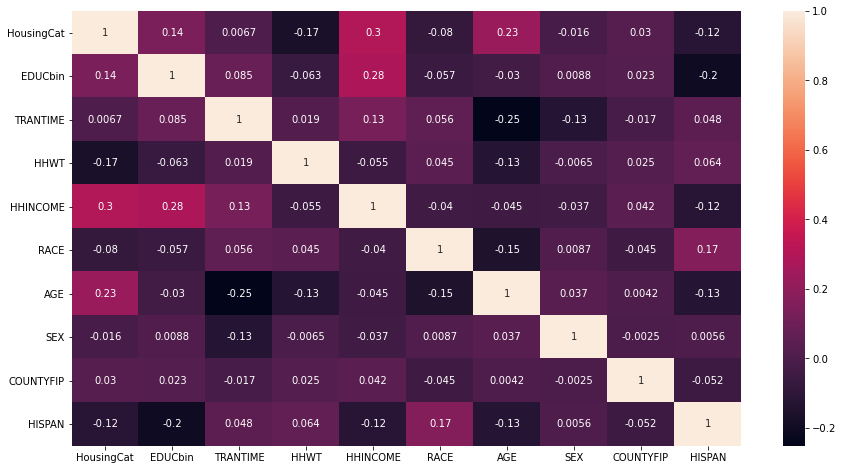

In [24]:
Xcorr19=dfX19fin.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr19.corr(), annot = True)


In [25]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX10.iloc[:,0:3])
X10fin = scaler.inverse_transform(dfX10)
dfX10fin = pd.DataFrame(X10fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX10fin['labels'] = kmeans.labels_
cluster_sum10 = dfX10fin.groupby(by = 'labels').mean()
cluster_sum10.head(5)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.000000,0.000000,8.311891,18.186226,86534.360075,2.448684,53.102443,1.548827,53.831618,0.470251
1,1.816378,1.000000,11.849024,18.170878,136511.353001,2.262138,49.380391,1.524656,55.140022,0.193769
2,0.391211,0.145278,10.025884,22.861778,46992.433084,2.895852,43.351310,1.539566,52.248687,0.628307
3,1.616042,0.485011,64.852713,20.161208,116646.961642,2.698102,43.321468,1.388535,51.684387,0.478809


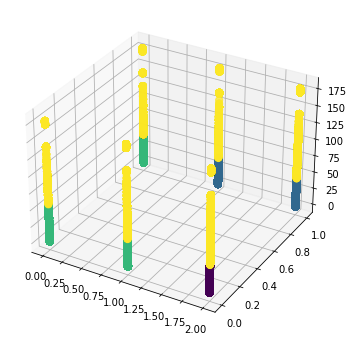

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(26,6))
ax = fig.add_subplot(131,projection='3d')
ax.scatter(dfX10fin.HousingCat,dfX10fin.EDUCbin,dfX10fin.TRANTIME,c=dfX10fin.labels,s=50)

<AxesSubplot:>

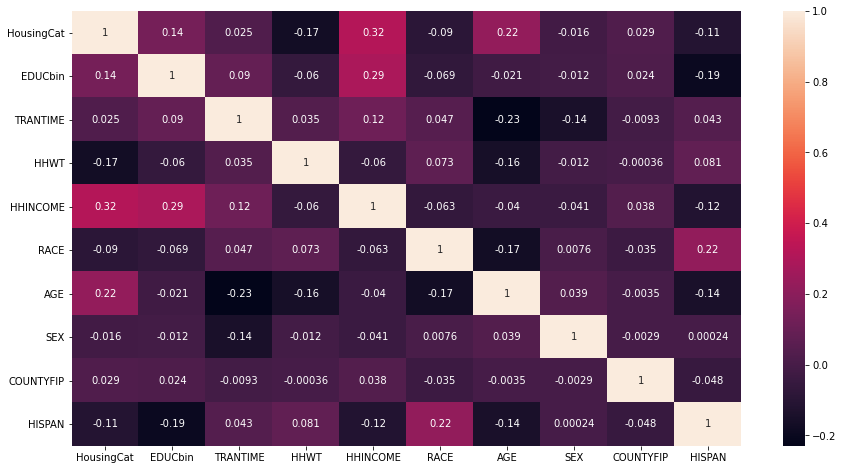

In [27]:
Xcorr10=dfX10fin.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr10.corr(), annot = True)


In [28]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX00.iloc[:,0:3])
X00fin = scaler.inverse_transform(dfX00)
dfX00fin = pd.DataFrame(X00fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX00fin['labels'] = kmeans.labels_
cluster_sum00 = dfX00fin.groupby(by = 'labels').mean()
cluster_sum00.head(5)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.000000,0.000000,9.552195,19.452120,72501.662914,2.645157,50.562585,1.548115,52.861837,0.461594
1,1.766062,1.000000,15.008891,20.049809,110868.113690,2.202240,46.303897,1.501485,54.308015,0.171414
2,0.532048,0.095235,10.468938,20.373155,49265.692795,3.343399,40.657700,1.525789,51.699441,0.696424
3,1.549440,0.375000,80.903810,20.257028,89374.402053,2.733913,40.906761,1.370745,50.977984,0.471149


<AxesSubplot:>

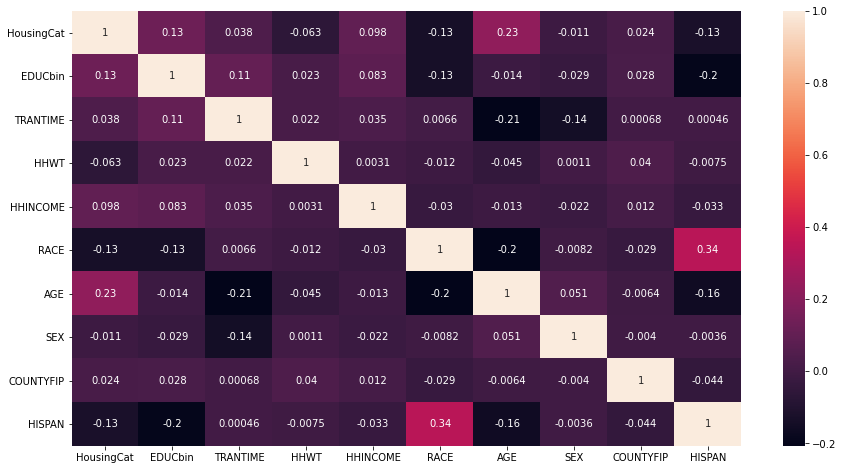

In [29]:
Xcorr00=dfX00fin.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr00.corr(), annot = True)


In [30]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX90.iloc[:,0:3])
X90fin = scaler.inverse_transform(dfX90)
dfX90fin = pd.DataFrame(X90fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX90fin['labels'] = kmeans.labels_
cluster_sum90 = dfX90fin.groupby(by = 'labels').mean()
cluster_sum90.head(5)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.000000,0.000000,8.200154,19.382852,50344.338479,1.968691,50.362844,1.569326,52.958754,0.295185
1,1.770943,1.000000,15.426928,19.976285,71433.732782,1.765125,43.500383,1.478019,53.937945,0.146629
2,0.500794,0.093987,10.423392,21.640624,29715.600988,2.640184,39.138719,1.533481,52.118339,0.538956
3,1.602153,0.271089,59.800477,20.401737,59819.405186,2.189663,39.122303,1.352164,51.615530,0.392465


<AxesSubplot:>

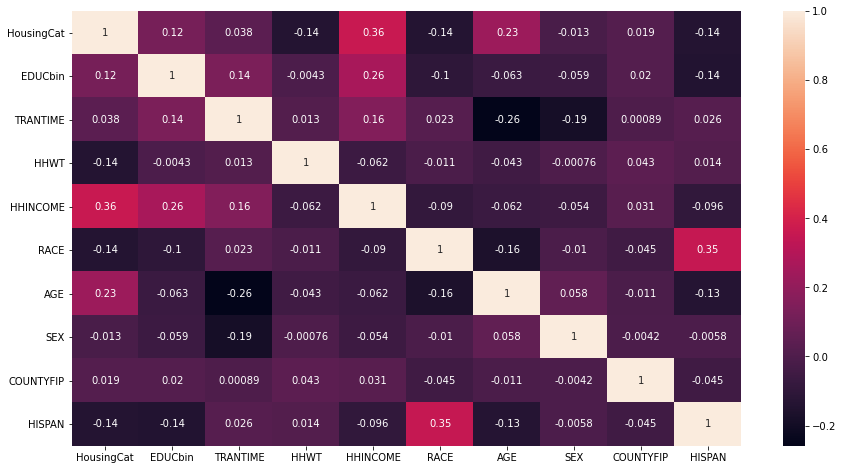

In [31]:
Xcorr90=dfX90fin.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr90.corr(), annot = True)


## Geographic Grouping

In [32]:
dfX19fin.head(5)

,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN,labels
0,1.0,1.0,1.000000e+01,20.0,56113.0,1.0,41.0,1.0,59.0,1.0,0
1,1.0,0.0,1.776357e-15,20.0,56113.0,1.0,32.0,2.0,59.0,1.0,3
2,2.0,1.0,1.776357e-15,15.0,250353.0,1.0,34.0,2.0,81.0,0.0,0
3,2.0,1.0,2.500000e+01,15.0,250353.0,1.0,34.0,1.0,81.0,0.0,0
4,2.0,1.0,1.776357e-15,14.0,117407.0,1.0,55.0,2.0,37.0,0.0,0


In [33]:
import geopandas as gpd
countygeo=gpd.read_file("C:/Users/Aren Kabarajian/Documents/NYU_CUSP/Capstone/ca-county-boundaries/CA_Counties/CA_Counties_TIGER2016.shp")
countygeo.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [34]:
clust2019_0 = dfX19fin[dfX19fin['labels']==0]
clust2019_1 = dfX19fin[dfX19fin['labels']==1]
clust2019_2 = dfX19fin[dfX19fin['labels']==2]
clust2019_3 = dfX19fin[dfX19fin['labels']==3]

In [35]:
def GEOIDfunc(geoid):
    if len(geoid)==1:
        geoid='0600'+geoid
    elif len(geoid)==2:
        geoid='060'+geoid
    elif len(geoid)==3:
        geoid='06'+geoid
    else:
        pass
    return geoid

In [36]:
dfX19fin

,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN,labels
0,1.0,1.0,1.000000e+01,20.0,56113.0,1.0,41.0,1.0,59.0,1.0,0
1,1.0,0.0,1.776357e-15,20.0,56113.0,1.0,32.0,2.0,59.0,1.0,3
2,2.0,1.0,1.776357e-15,15.0,250353.0,1.0,34.0,2.0,81.0,0.0,0
3,2.0,1.0,2.500000e+01,15.0,250353.0,1.0,34.0,1.0,81.0,0.0,0
4,2.0,1.0,1.776357e-15,14.0,117407.0,1.0,55.0,2.0,37.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1357999,2.0,0.0,3.000000e+01,11.0,102700.0,1.0,25.0,2.0,59.0,1.0,3
1358000,2.0,0.0,1.776357e-15,11.0,102700.0,1.0,81.0,2.0,59.0,1.0,3
1358001,2.0,0.0,1.776357e-15,11.0,102700.0,1.0,94.0,1.0,59.0,1.0,3
1358002,2.0,1.0,1.000000e+01,14.0,158000.0,8.0,25.0,2.0,107.0,0.0,0


In [38]:
df10geo = dfX10fin[['COUNTYFIP','EDUCbin','HHWT','labels']].groupby(['COUNTYFIP','labels']).agg({'EDUCbin' : ['count'], 'HHWT' : ['sum']}).copy()


In [39]:
df10geo = (df10geo['HHWT']/df10geo['HHWT'].sum())*df10geo['EDUCbin'].values

In [40]:
df10geo.columns = ['Weighted_pop']

In [41]:
df10geo.reset_index(inplace=True)

In [42]:

df10geo['COUNTYFIP'] = pd.Series(df10geo['COUNTYFIP'], dtype="int")
df10geo['COUNTYFIP'] = pd.Series(df10geo['COUNTYFIP'], dtype="string")
df10geo['Weighted_pop'] = pd.Series(df10geo['Weighted_pop'], dtype="int")


In [43]:
df10geo.dtypes

COUNTYFIP       string
labels           int64
Weighted_pop     int32
dtype: object

In [44]:
def GEOIDfunc(geoid):
    if len(geoid)==1:
        geoid='0600'+geoid
    elif len(geoid)==2:
        geoid='060'+geoid
    elif len(geoid)==3:
        geoid='06'+geoid
    else:
        pass
    return geoid

In [45]:
df10geo['GEOID'] = df10geo.apply(lambda x: GEOIDfunc(x['COUNTYFIP']), axis=1)

In [46]:
# COUNTYcsv = 'C:/Users/akaba/Downloads/CA_counties.csv'
# counties = pd.read_csv(COUNTYcsv)
# countiesdf = pd.DataFrame(counties)
# countiesdf['FIPS']= countiesdf['FIPS'].astype(str)
# countiesdf['FIPS']='0'+countiesdf['FIPS']

In [47]:
# df10geomerged = df10geo.merge(countiesdf,how='inner',left_on='GEOID',right_on='FIPS')
# df10geomerged = df10geomerged[['GEOID','labels','COUNTY','Weighted_pop']]
# df10geomerged

In [48]:
df10geo = df10geo.sort_values('GEOID')
df10sum = df10geo[['Weighted_pop','GEOID']].groupby('GEOID').sum()
df10sum.columns = ['County_pop']
df10sum = df10sum.reset_index()
df10geo = df10geo.merge(df10sum,how='right')
df10geo['perc_pop'] = round(df10geo['Weighted_pop']/df10geo['County_pop'],2)
df10geo

,COUNTYFIP,labels,Weighted_pop,GEOID,County_pop,perc_pop
0,0,0,312,06000,555,0.56
1,0,1,117,06000,555,0.21
2,0,2,116,06000,555,0.21
3,0,3,10,06000,555,0.02
4,1,0,149,06001,587,0.25
...,...,...,...,...,...,...
135,111,3,5,06111,178,0.03
136,113,2,3,06113,9,0.33
137,113,0,2,06113,9,0.22
138,113,1,4,06113,9,0.44


In [49]:
cluster0_2019 = df10geo[(df10geo['labels'] == 0)]
cluster1_2019 = df10geo[(df10geo['labels'] == 1)]
cluster2_2019 = df10geo[(df10geo['labels'] == 2)]
cluster3_2019 = df10geo[(df10geo['labels'] == 3)]


In [50]:
cluster0_2019_geo=countygeo.merge(cluster0_2019,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster1_2019_geo=countygeo.merge(cluster1_2019,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster2_2019_geo=countygeo.merge(cluster2_2019,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster3_2019_geo=countygeo.merge(cluster3_2019,left_index=True, right_index=True, how='left', suffixes=['','_norm'])


In [52]:
# cluster0_2019 = tzs2[(tzs2['labels'] == 0)]
# cluster1_2019 = tzs2[(tzs2['labels'] == 1)]
# cluster2_2019 = tzs2[(tzs2['labels'] == 2)]
# cluster3_2019 = tzs2[(tzs2['labels'] == 3)]


C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


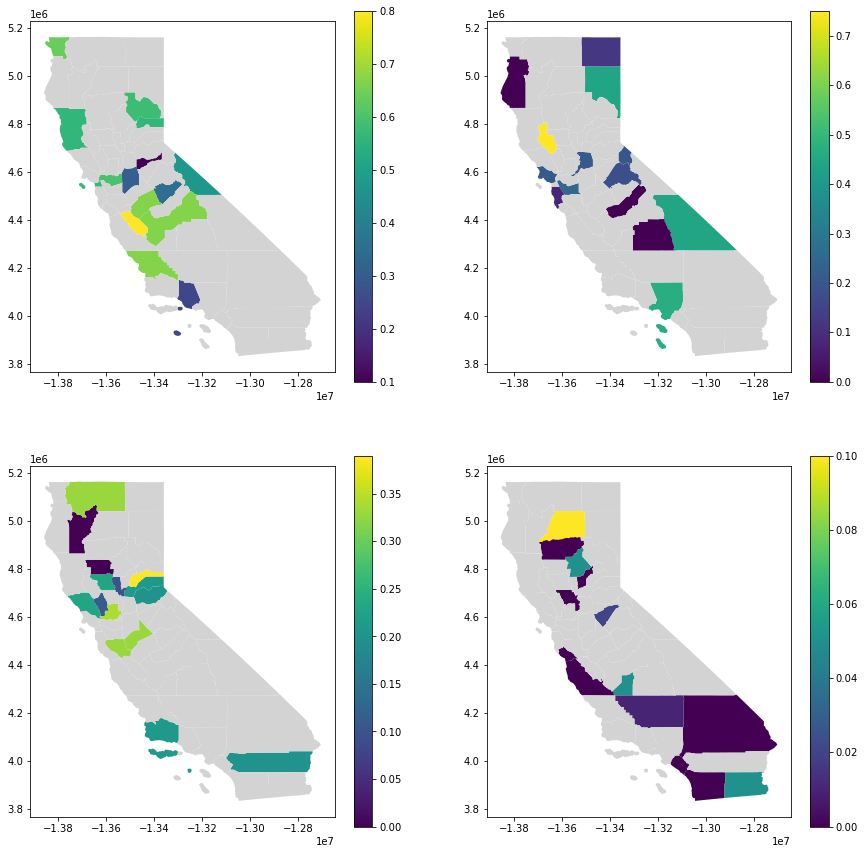

In [53]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax1 = cluster0_2019_geo.plot(axes=ax1,column="perc_pop",legend=True,missing_kwds={'color': 'lightgrey'})
ax2 = fig.add_subplot(2,2,2)
ax2 = cluster1_2019_geo.plot(axes=ax2,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'})
ax3 = fig.add_subplot(2,2,3)
ax3 = cluster2_2019_geo.plot(axes=ax3,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'})
ax4 = fig.add_subplot(2,2,4)
ax4 = cluster3_2019_geo.plot(axes=ax4,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'})
plt.show()